In [15]:
from ADX import addADX
import pandas as pd
import yfinance as yf
from getDataFrame import getTickerDF
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [18]:
#Create dataframe and define price and adx series for testing
s = yf.Ticker("MSFT")
df = s.history(period = "5y", i = "1d").loc[:, ["Open", "High", "Low", "Close", "Volume"]]
df = addADX(df)
adx = df["ADX"]
pdi = df["PDI"]
ndi = df["NDI"]
price = (df["High"] + df["Low"] + df["Close"])/3

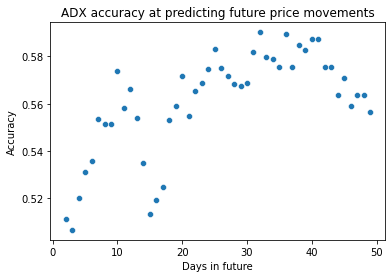

In [19]:
adx_indicator = []
i=0
while i < len(adx):
    if adx[i] > 25 and ndi[i] > pdi[i]: #Strong downtrend
        adx_indicator.append("Sell")
    elif adx[i] > 25 and pdi[i] > ndi[i]: #Strong uptrend
        adx_indicator.append("Buy")
    else: #Weak trend
        adx_indicator.append("None")
    i+=1

days = []
accuracy = [] 
for i in range(2,50):
    ts = 0 #initialize true signal
    fs = 0 # initialize false signal
    for j in range(0, len(adx_indicator)-i):
        if adx_indicator[j] == "Sell" and price[j] < price[j+i]: #Strong downtrend and price increases
            fs += 1
        elif adx_indicator[j] == "Buy" and price[j] > price[j+i]: #Strong uptrend and price decreases
            fs += 1 
        elif adx_indicator[j] == "Buy" and price[j] < price[j+i]: #Strong uptrend and price increases
            ts += 1
        elif adx_indicator[j] == "Sell" and price[j] > price[j+i]: #Strong downtrend and price decreases
            ts += 1
    days.append(i)
    accuracy.append(ts/(ts+fs))

graph = sns.scatterplot(x=days, y = accuracy
graph.set(title = "ADX accuracy at predicting future price movements", xlabel = "Days in future", ylabel = "Accuracy")
plt.show()